## Quá trình Train Model:
* Tổng thời gian run end to end: 8 phút 
* (không bao gồm thời gian tuning parameter, do bước này đã thực hiện xong rồi nên marked lại để không run lại)
* Chi tiết thực hiện tại file Train

Bước 1: Đọc dữ liệu
* 1) Đọc dữ liệu từ file excel và xem một số info(), kiểm tra sơ bộ missing values
* 2) Quan sát sơ bộ dữ liệu có thể thấy dữ liệu thuộc dạng có cấu trúc (structured data). Tuy nhiên, chưa đạt được mức độ clean và standard cần thiết.
* Nhận xét: đây là bài toán dự đoán Giá nhà, thuộc nhóm Regression

Bước 2: Làm sạch dữ liệu
* 1) Tìm hiểu cấu trúc và quy luật typing của từng cột dữ liệu.
* 2) Bóc tách và làm sạch cho từng thuộc tính. Sử dụng các kỹ thuật: bỏ dấu Tiếng Việt, tách chữ, RegEx,... để lấy dữ liệu
* 3) Có thể 1 cột dữ liệu nhưng được bóc tách thành nhiều thuộc tính. Hoặc từ 2 cột dữ liệu được chuyển hoá thành thuộc tính mới.
* 3) Cố gắng sử dụng domain knowledge để tạo ra nhiều thuộc tính hợp lý nhất có thể để phục vụ cho bước EDA và Feature selection.    

Bước 3: EDA
* 1) Kiểm tra correlation giữa các thuộc tính liên tục với thuộc tính Giá. Từ đó, loại bỏ được khá nhiều nhiều thuộc tính đã tạo ra nhưng không tương quan với Giá.
* 2) Sử dụng kiểm định ANOVA để kiểm tra  giữa các thuộc tính phân loại với thuộc tính Giá. Từ đó, cũng loại bỏ được khá nhiều nhiều thuộc tính phân loại không tương quan với Giá.
* 3) Thông tin từ EDA còn cho thấy: các thuộc tính liên tục là Đơn giá, Diện tích và cả Giá đều có phân phối nhọn hơn PP chuẩn và lệch phải (đuôi của phân phối kéo rất dài về bên phải). 
* 4) Ngoài ra, phát hiện 1 mẫu có Giá và số Lầu không logic, và sau khi so sánh với các mẫu tương tự thì kết luận là có thể do lỗi typing => Xoá bỏ mẫu này tại bước Feature selection

Bước 4: Phân tích sâu hơn các thuộc tính location
* 1) Các thuộc tính về location như: Đường, Phường, Quận chứa rất nhiều unique values (142 unique values đổi với Phường và 1044 unique values đối với Đường.
* 2) Ngoài ra, các unique values có thể trùng tên nhưng bản chất thực tế location khác nhau: Ví dụ: Phường 1 thuộc Quận 3 khác với Phường 1 thuộc Quận 10, Quận 11, Quận 8, Quận 6, ...
* 3) Về mặt domain knowledge, các thuộc tính về location có ảnh hưởng lớn đến Giá BĐS. Ở những location đắc địa, Đơn giá nhà sẽ cao hơn. Do đó, 2 Nhà có cùng chung các đặc điểm, Nhà nào ở location đắc địa hơn thì Đơn giá sẽ cao hơn, dẫn đến Giá cả cũng cao hơn.
* 4) Thực tế kiểm định ANOVA phía trên cũng khẳng định các thuộc tính location có tương quan khá lớn với thuộc tính f_Gia.
* 5) Tuy nhiên, nếu ghép Đường, Phường, Quận cách đơn thuần, thì sẽ tạo ra các feature về location có số lượng unique values rất lớn. Do đó, Thông qua phân tích sâu hơn các thuộc tính location với thuộc tính Đơn giá thì đã gom nhóm các Phường trong cùng Quận mà có Đơn giá tương đương nhau thành các nhóm.
* 6) Sau khi gom nhóm, căn cứ thêm vào biểu đồ boxplot và domain knowledge để revise lại một số Phường bị ghép nhóm chưa hợp lý. Kết quả gom nhóm được chuyển thành thuộc tính f_Area_2, và <span style="color:blue"> tạo thêm feature mới ghép từ f_Quan và f_Area_2, có tên gọi là f_Location_qa_2  </span> 
* 7) Những Quận mà Đơn giá giữa các Phương không chênh lệch nhiều thường sẽ có ít nhóm. Ví dụ: Quận Gò Vấp, Quận 12,... nhưng Quận 1, Quận 3, Quận 5,...
* 8) Danh sách gom nhóm Area này được <span style="color:blue"> lưu lại thành thành file excel </span> để sử dụng cho New data

Bước 5: Feature selection
* 1) Căn cứ vào các chỉ số tương quan với thuộc tính target là Giá nhiều lần thử nghiệm trên các models, chỉ một số thuộc tính sau được chọn: 'f_Nha_ve_sinh', 'f_Chieu_dai', 'f_Rong', 'f_Dien_tich', 'f_Dien_tich_su_dung', 'f_Lo_gioi', 'f_Lau_n','f_Nha_hem', 'f_Quan', 'f_Location_qa_2'
* 2) Loại bỏ 1 mẫu có Giá và số Lâu không logic
* 3) Loại bỏ các mẫu có null values

Bước 6: Feature Engineering
* 1) Thực hiện OneHotEncoder với các thuộc tính phân loại dạng chữ: 'f_Quan', 'f_Location_qa_2'
* 2) Thực hiện RobustScaler với các thuộc tính liên tục còn lại

Bước 7: Tách dữ liệu
* 1) Tách tập dữ liệu Train sau khi đã transform thành X_train và X_test với tỷ lệ 80:20 theo 2 cách: dùng train_test_split() và dùng StratifiedShuffleSplit()
* 2) Sau khi so sánh thì chọn cách tách StratifiedShuffleSplit() vì sau khi thử nghiệm thì hiệu suất mô hình cao hơn
* 3) Tạo 2 tập dữ liệu có scale và không cần scale để thử nghiệm: X_train và X_test, X_train_scale và X_test_scale

Bước 8: Build các Models khác nhau: LinearRegression, KNeighborsRegressor, SVR, RandomForestRegressor, GradientBoostingRegressor
* 1) Thực hiện Cross validation với số lượng lặp cv=10 trên các model tổng quát (chưa tuning parameter) để chọn ra các model tốt. Căn cứ để lựa chọn là các chỉ số: score và RMSE. Theo đó, chọn được các models: RandomForestRegressor, GradientBoostingRegressor
* 2) Tuning parameter đối với các models: RandomForestRegressor, GradientBoostingRegressor
* 2) Thực hiện Training, Model evaluation và Cross validation thì đi đến kết luận: 
** <span style="color:blue"> model tốt nhất là GradientBoostingRegressor với n_estimators = 600 </span>

Bước 9: Xây dựng Pipeline
* 1) Xây dựng hàm tự định nghĩa có tên Pre_process(), Create_XY(), Concating() có chức năng fit và transform cho các bước tiền xử lý dữ liệu giống như đã thực hiện khi Training model (đặc biệt là các bước clean data và tạo thuộc tính mới)
* 2) Tạo pipline gồm các bước/model: tiền xử lý dữ liệu bằng Pre_process(), Create_XY, Concating() và lưu thành 2 pickle

Bước 10: Lưu model
* 1) Sử dụng thư viện pickle và phương thức dump để lưu thành các file pickles
* 2) Pipeline các bước/model: tiền xử lý dữ liệu bằng Pre_process(), Create_XY(), Concating() được lưu thành 2 pickle
* 3) Model OneHotEncoder được lưu thành 1 pickle và model GradientBoostingRegressor cũng lưu thành 1 pickle
* 4) Tổng cộng có 4 file pickles

# NEW DATA

In [1]:
import os
import time
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import chi2_contingency, chi2
import statsmodels.api as sm
from statsmodels.formula.api import ols
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb 

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import Pipeline
import pickle

import sys; 
path=os.path.abspath(os.path.join(os.getcwd(), os.pardir)) + '\Lib'
sys.path.insert(0,path)
import import_ipynb
from lib_evaluation_regression_model import *

import warnings
warnings.filterwarnings('ignore')

importing Jupyter notebook from lib_evaluation_regression_model.ipynb


In [2]:
# Đọc dữ liệu
df_new = pd.read_excel('House_test.xlsx')

In [3]:
# Load các models
my_model_pre = Load_Object('model_pre_buithihuong.pkl')
my_model_concating = Load_Object('model_concating_buithihuong.pkl')
my_model_gbr = Load_Object('model_gbr_buithihuong.pkl')

In [ ]:
# Pre-processing
X_new, y_new = my_model_pre.transform(df_new)

In [ ]:
X_new.head()

In [6]:
# EDA tập New data
lst_ = ['f_Nha_ve_sinh', 'f_Chieu_dai', 'f_Rong', 'f_Dien_tich',
       'f_Dien_tich_su_dung', 'f_Lo_gioi', 'f_Lau_n', 'f_Nha_hem'
       ]
continous_feature_describe(lst_, X_new)

,feature_name,count,min,max,mean,std,var,skewness,kurtosis,do_lech,do_nhon
0,f_Nha_ve_sinh,1462,1.00,70.00,3.360465,3.324255,11.050674,9.009220,139.246990,lech phai,nhon hon PP chuan
1,f_Chieu_dai,1462,2.02,56.44,14.406615,6.693995,44.809569,1.321678,4.051854,lech phai,nhon hon PP chuan
2,f_Rong,1462,1.80,33.33,4.734665,2.405769,5.787727,4.613211,34.183541,lech phai,nhon hon PP chuan
3,f_Dien_tich,1462,6.20,1657.40,69.911696,78.627263,6182.246482,10.598537,169.985813,lech phai,nhon hon PP chuan
4,f_Dien_tich_su_dung,1462,4.00,882.40,140.313953,105.624877,11156.614740,2.465221,9.513356,lech phai,nhon hon PP chuan
5,f_Lo_gioi,1462,0.70,44.00,5.964124,5.279363,27.871679,2.929212,12.221608,lech phai,nhon hon PP chuan
6,f_Lau_n,1462,0.00,7.00,1.484952,0.998002,0.996009,0.639324,1.160464,lech phai,nhon hon PP chuan
7,f_Nha_hem,1462,0.00,1.00,0.777702,0.415933,0.173000,-1.337150,-0.212323,lech trai,bet hon PP chuan


In [7]:
# # OneHotEncoder and concating
X_new = my_model_concating.transform(X_new)

In [8]:
# Prediction and Evaluation
model = my_model_gbr
print('New Dataset RMSE: ', mean_squared_error(y_true=y_new, y_pred=model.predict(X_new), squared=False))
print('New Dataset R-square: ', model.score(X_new, y_new))

New Dataset RMSE:  5399.0483797303905
New Dataset R-square:  0.7354347057033936


In [9]:
r2, mse, mae = Static_score_model_reg(y_new, model.predict(X_new))
print('New Dataset R-square: ', r2)
print('New Dataset MSE: ', mse)
print('New Dataset MAE: ', mae)

New Dataset R-square:  0.7354347057033936
New Dataset MSE:  29149723.406669356
New Dataset MAE:  2293.0561354601077


In [10]:
df_compare = pd.DataFrame({'True value': y_new,
                          'Prediction': model.predict(X_new)})
df_compare

,True value,Prediction
0,3800.0,4211.974360
1,11000.0,11458.714901
2,28000.0,34230.582881
3,78000.0,61777.993870
4,5050.0,6985.616498
...,...,...
1457,7900.0,8287.746196
1458,6000.0,7832.852245
1459,5100.0,5035.313874
1460,47000.0,31923.360504


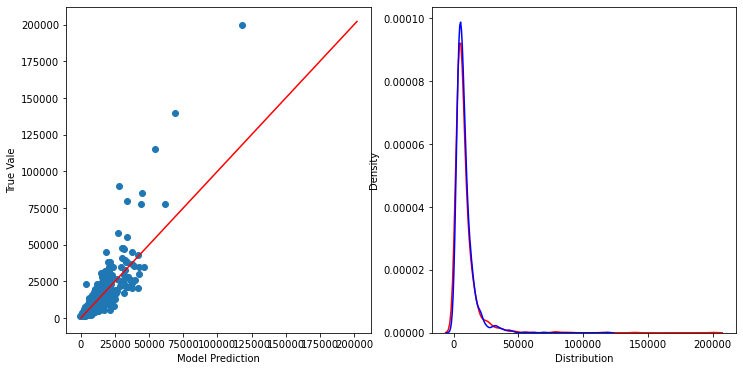

In [11]:
# Visualization
Visualize_model_reg(y_new, model.predict(X_new))